## Importing Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Ethereum.csv")
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Ethereum,ETH,2019-01-01 23:59:59,141.397504,132.650705,133.418145,140.819413,2258709868,14665318370
1,2,Ethereum,ETH,2019-01-02 23:59:59,156.929131,140.650960,141.519517,155.047677,3328240369,16150049902
2,3,Ethereum,ETH,2019-01-03 23:59:59,155.863058,147.198367,155.196038,149.135003,2676164880,15536849936
3,4,Ethereum,ETH,2019-01-04 23:59:59,156.878976,147.907099,148.912894,154.581942,3126192535,16107068093
4,5,Ethereum,ETH,2019-01-05 23:59:59,160.824889,154.337420,154.337420,155.638589,3338211928,16219974745


In [3]:
df.dtypes

SNo            int64
Name          object
Symbol        object
Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume         int64
Marketcap      int64
dtype: object

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

SNo                   int64
Name                 object
Symbol               object
Date         datetime64[ns]
High                float64
Low                 float64
Open                float64
Close               float64
Volume                int64
Marketcap             int64
dtype: object

In [5]:
df['Date']= df['Date'].apply(lambda x:x.date())
df.drop(["SNo","Name","Symbol","High","Low","Open","Volume","Marketcap"], axis = 1, inplace=True)

In [6]:
df.head()

,Date,Close
0,2019-01-01,140.819413
1,2019-01-02,155.047677
2,2019-01-03,149.135003
3,2019-01-04,154.581942
4,2019-01-05,155.638589


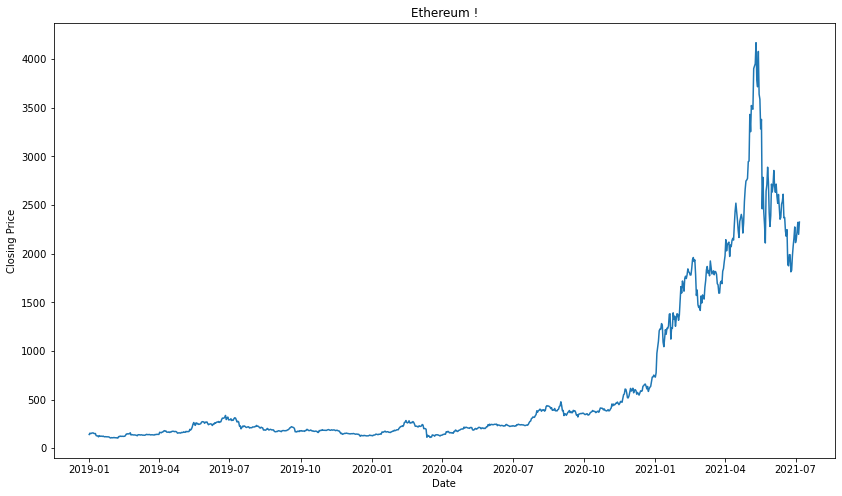

In [7]:
plt.figure(figsize=(14,8))
plt.plot(df.Date,df.Close)

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Ethereum !')
 
plt.show()

## Differentiating to make Stationary

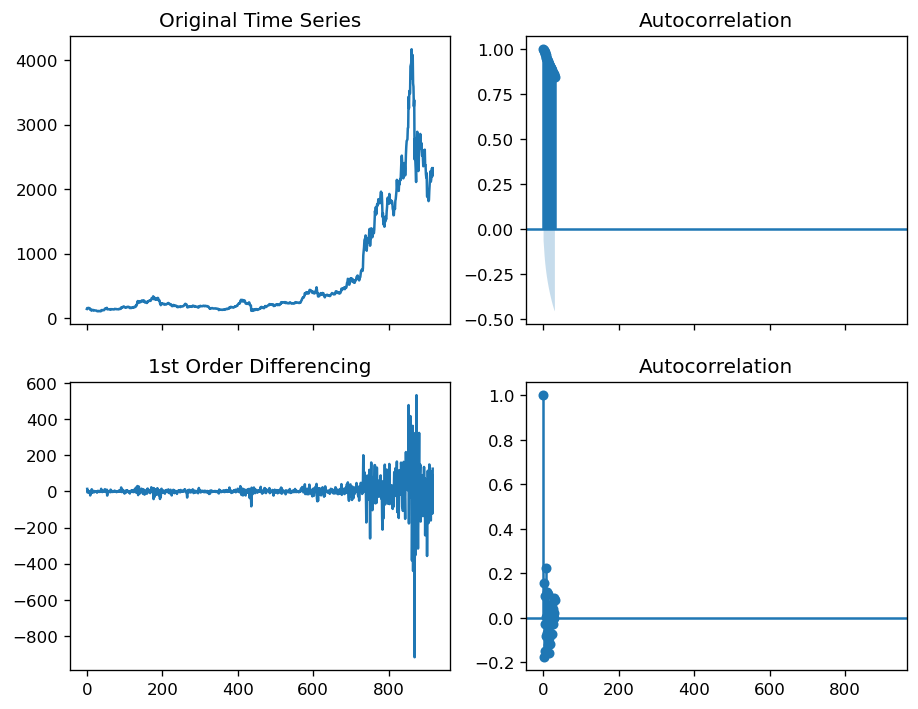

In [8]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(2, 2, sharex=True)
axes[0, 0].plot(df.Close); axes[0, 0].set_title('Original Time Series')
plot_acf(df.Close, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.Close.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.Close.diff().dropna(), ax=axes[1, 1])

plt.show()

## Checking Best Model for our Data

In [9]:
model = auto_arima(df["Close"], trace = True, suppress_warnings = True)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10351.078, Time=1.41 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10395.698, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10368.277, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10374.841, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10394.761, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=10351.085, Time=1.23 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=10356.055, Time=0.99 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=10349.930, Time=2.12 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=10357.295, Time=1.74 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=10285.772, Time=4.66 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=10340.913, Time=2.63 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=10265.350, Time=4.55 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=10333.679, Time=1.81 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=10302.655, Time=5.28 sec
 ARIMA(4,1,3)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  918
Model:               SARIMAX(5, 1, 2)   Log Likelihood               -5124.118
Date:                Thu, 28 Oct 2021   AIC                          10264.237
Time:                        16:55:51   BIC                          10302.806
Sample:                             0   HQIC                         10278.957
                                - 918                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5213      0.023    -22.997      0.000      -0.566      -0.477
ar.L2         -0.6916      0.025    -27.241      0.000      -0.741      -0.642
ar.L3         -0.0265      0.019     -1.430      0.153      -0.063       0.010
ar.L4          0.0908      0.014      6.365      0.000       0.063       0.119
ar.L5         -0.1699      0.013    -12.897      0.000      -0.196      -0.144
ma.L1          0.3891      0.016     24.634      0.000       0.358       0.420
ma.L2          0.8570      0.018     47.618      0.000       0.822       0.892
sigma2      4174.4877     55.347     75.423      0.000    4066.009    4282.967
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):             49650.08
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):             129.40   Skew:                            -1.30
Prob(H) (two-sided):                  0.00   Kurtosis:                        38.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Fitting SARIMAX(5,1,2) Model

In [10]:
mod = sm.tsa.statespace.SARIMAX(df.Close, order=(5, 1, 2), seasonal_order=(0, 0, 0, 12),
                                enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6472      0.230     -2.818      0.005      -1.097      -0.197
ar.L2          0.5139      0.184      2.799      0.005       0.154       0.874
ar.L3          0.1590      0.027      5.944      0.000       0.107       0.211
ar.L4          0.0016      0.034      0.047      0.962      -0.065       0.068
ar.L5          0.0343      0.019      1.837      0.066      -0.002       0.071
ma.L1          0.5530      0.180      3.064      0.002       0.199       0.907
ma.L2         -0.4955      0.198     -2.504      0.012      -0.883      -0.108
sigma2      4441.0924   1077.053      4.123      0.000    2330.107    6552.077


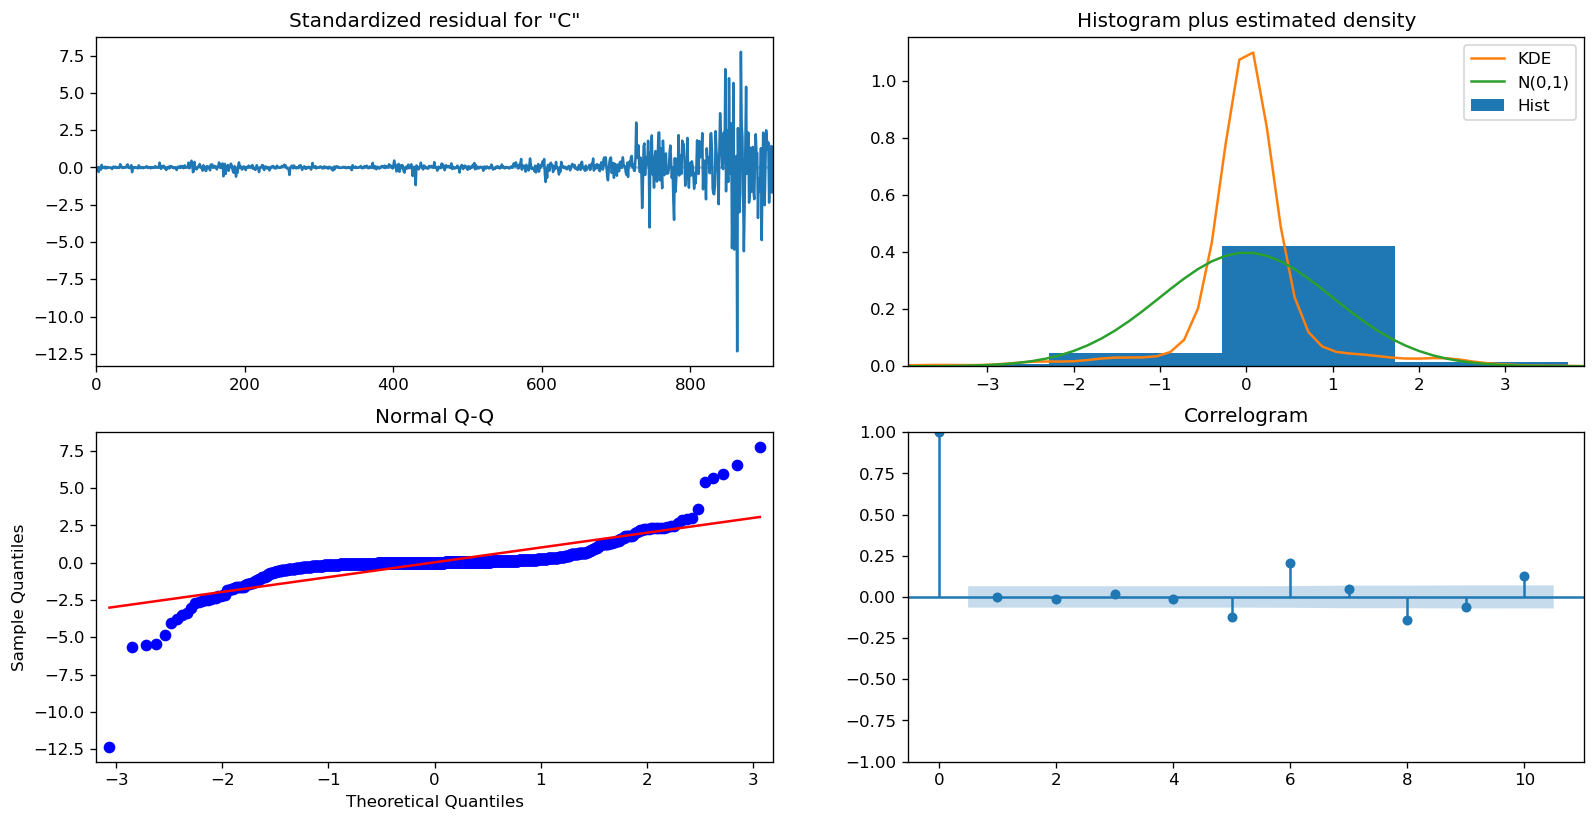

In [11]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

## Validating Forecast

In [12]:
pred = results.get_prediction(start=890, dynamic=False)
pred_ci = pred.conf_int()

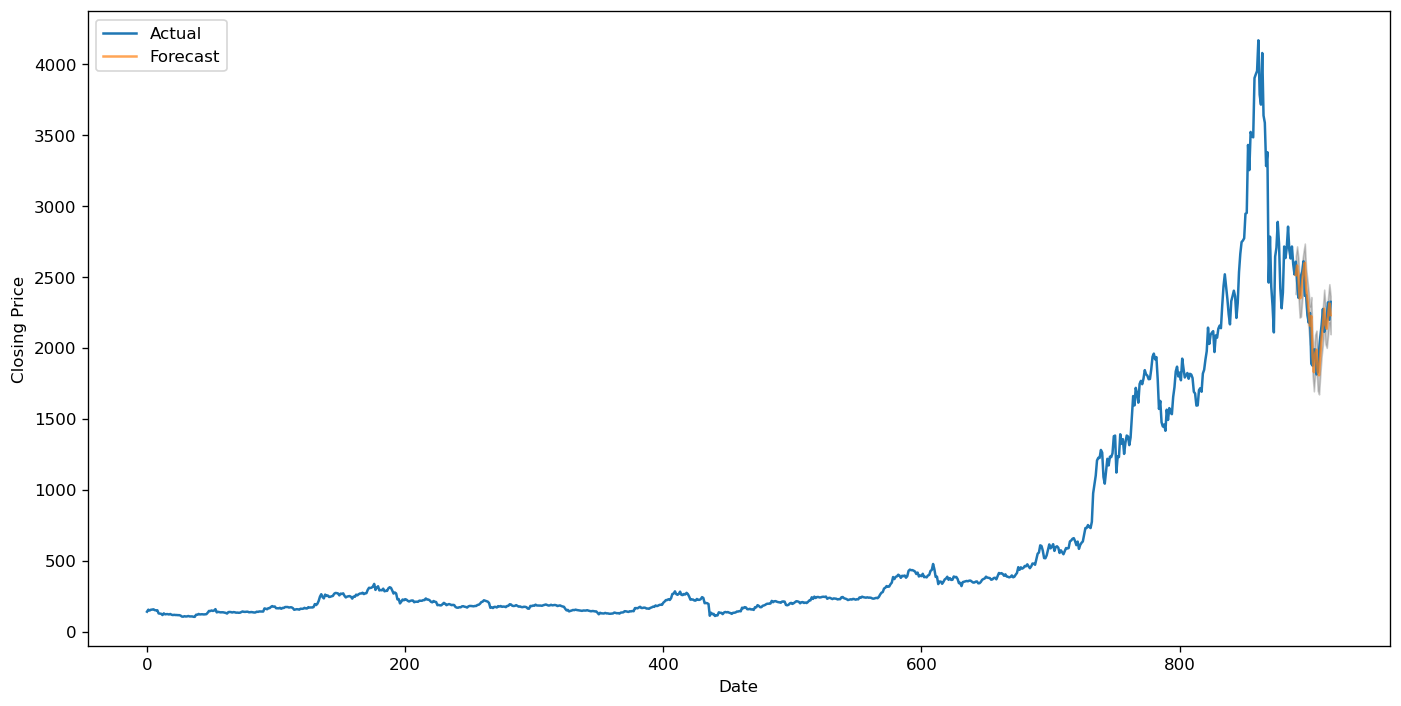

In [13]:
ax = df.Close.plot(label='Actual')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Closing Price')
plt.legend()
plt.show()

In [14]:
forecasted = pred.predicted_mean
actual = df.Close.mean()
mse = ((forecasted - actual) ** 2).mean()
print('RMSE is {}'.format(round(np.sqrt(mse), 2)))

RMSE is 1620.62


## Forecasting

In [15]:
days = int(input("Enter no. of days for forecasting :"))

Enter no. of days for forecasting :50


In [16]:
f, confint = model.predict(n_periods = days, return_conf_int=True)
f_index = np.arange(len(df.Close.values), len(df.Close.values)+ days)

forecast = pd.Series(f, index = f_index)
ls = pd.Series(confint[:, 0], index = f_index)
us = pd.Series(confint[:, 1], index = f_index)

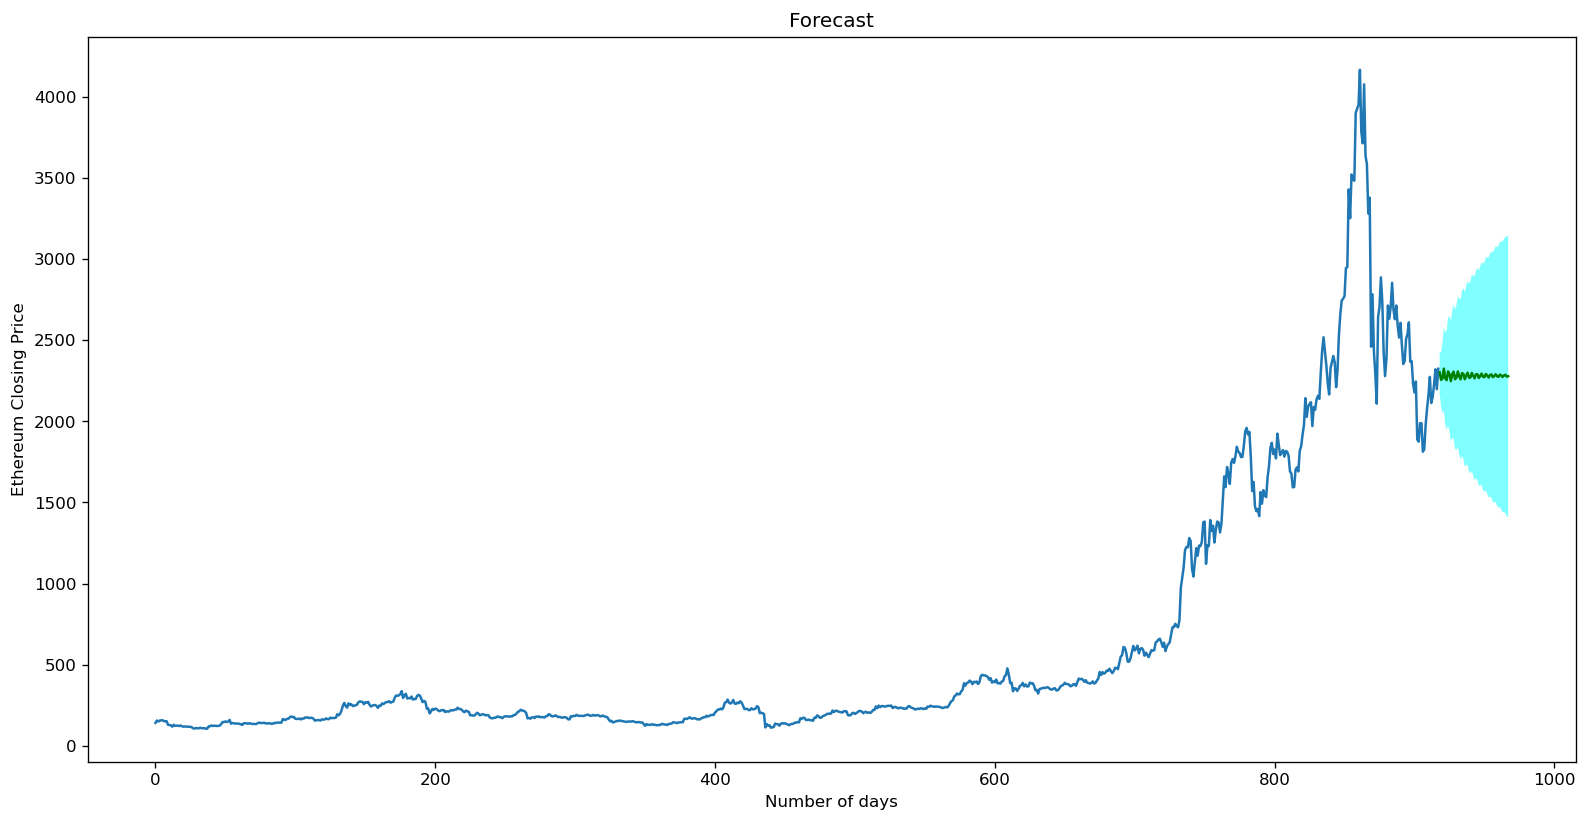

In [17]:
plt.figure(figsize = (16,8))
plt.plot(df.Close)
plt.plot(forecast, color='green')
plt.fill_between(ls.index, ls, us, alpha=0.5, facecolor='cyan')
plt.title("Forecast")
plt.xlabel("Number of days")
plt.ylabel("Ethereum Closing Price")
plt.show()